<a href="https://colab.research.google.com/github/itumor/colab/blob/master/trending_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trending Stock Prediction**

In [29]:
from datetime import datetime
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [30]:
stock ='AAPL'
startdate = '1900-01-01'
enddate = datetime.today().strftime('%Y-%m-%d')

In [31]:
df = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...
2020-09-24,477.000000,467.820007,470.529999,473.079987,3727200.0,473.079987
2020-09-25,484.869995,468.029999,474.390015,482.880005,3769400.0,482.880005
2020-09-28,492.000000,477.880005,489.109985,490.649994,4773500.0,490.649994


In [32]:
df.shape

(4622, 6)

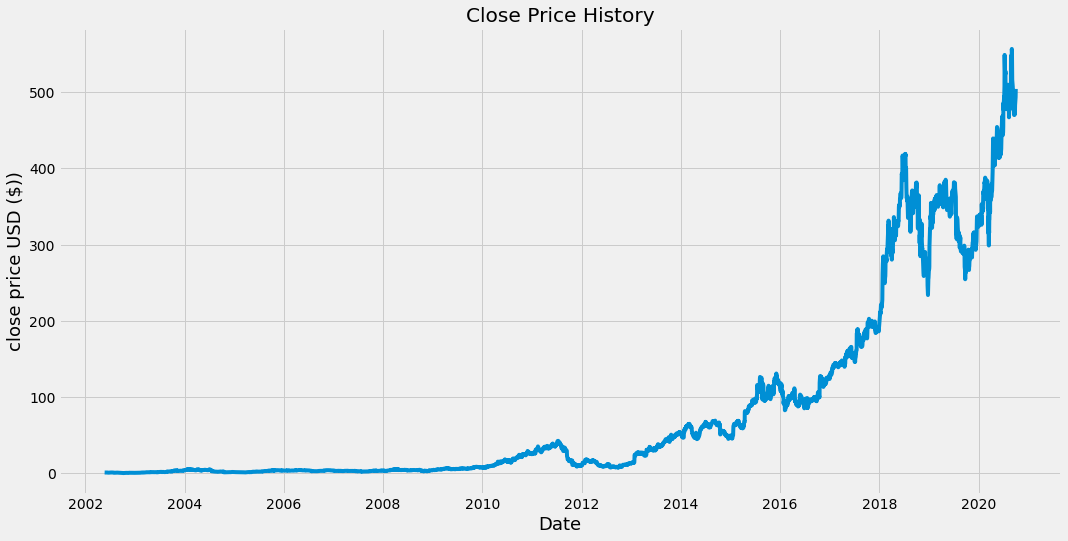

In [33]:

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($))', fontsize=18)
plt.show()


In [34]:
#data = df
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)


training_data_len



3698

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00148077],
       [0.00150517],
       [0.00141014],
       ...,
       [0.88151258],
       [0.88660092],
       [0.90573148]])

In [36]:
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60 :
    print(x_train)
    print(y_train)
    print()

[array([0.00148077, 0.00150517, 0.00141014, 0.00131382, 0.00125602,
       0.00126501, 0.00135877, 0.0013395 , 0.00139216, 0.00145509,
       0.00134079, 0.00140885, 0.00140372, 0.00129455, 0.00127657,
       0.00110319, 0.00098761, 0.00096706, 0.00104026, 0.00105054,
       0.00109035, 0.00108907, 0.00106338, 0.00110705, 0.00102614,
       0.00112631, 0.00117768, 0.00143839, 0.00151288, 0.00162461,
       0.00144353, 0.00141656, 0.0014217 , 0.00161177, 0.00150132,
       0.00138445, 0.00135491, 0.00128813, 0.00139601, 0.00141527,
       0.00143454, 0.00139087, 0.00133308, 0.00119309, 0.00089643,
       0.00090542, 0.00097348, 0.00104412, 0.00093239, 0.00072819,
       0.00072305, 0.00069736, 0.00075644, 0.00076158, 0.00074488,
       0.00069094, 0.0007192 , 0.00082836, 0.00091697, 0.00097091])]
[0.0010954886108702514]



In [37]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [38]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3638, 60, 1)

In [39]:
#model = Sequential()
#model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
#model.add(LSTM(100, return_sequences= False))
#model.add(Dense(50))
#model.add(Dense(1))

In [40]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy' )


In [ ]:
rmse= 100
while ( rmse >= 1):     
  model.fit(x_train, y_train, validation_data=(x_train, y_train) ,batch_size=100 , epochs=1)
  test_data = scaled_data[training_data_len - 60: , :]
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
  y_test.size
  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1 ))
  Predictions = model.predict(x_test)
  Predictions = scaler.inverse_transform(Predictions)
  rmse=np.sqrt(np.mean(((Predictions- y_test)**2)))
  rmse

32/37 [========================>.....] - ETA: 0s - loss: 5.5494e-06 - accuracy: 0.0000e+00

In [ ]:
#acc_callback = AccuracyStopping(0.05)
#model.fit(x_train, y_train, validation_data=(x_train, y_train) ,batch_size=1 , epochs=10)
#model.fit(x_train, y_train, batch_size=1000, epochs=1000)

In [ ]:
#model.fit(x_train, y_train, batch_size=1, epochs=100)
#model.fit(x_train, y_train, batch_size=1, epochs=100)

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

y_test.size
 



In [ ]:
x_test = np.array(x_test)


In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1 ))


In [ ]:
#Prediction 
Predictions = model.predict(x_test)
Predictions = scaler.inverse_transform(Predictions)

In [2]:
rmse=np.sqrt(np.mean(((Predictions- y_test)**2)))
rmse

NameError: ignored

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = Predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18 )
plt.ylabel('Close price0' , fontsize=18 )
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()


In [ ]:
valid

In [ ]:

stock_qoute = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)

new_df = stock_qoute.filter(['Close'])
last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

x_test = [ ]
x_test.append(last_60_days_scaled)

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

pred_price= model.predict(x_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)


In [ ]:
stock_qoute2 = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)
print(stock_qoute2['Close'])